# Introduction

Bitcoin has been a popular topic in recent years. It is known as a cryptocurrency based on Blockchain technology. In this tutorial, we are going to analyze Bitcoin Blockchain data, to have an intuition about what is going on within this distributed system. On the other hand, during the processing of data, we will also introduce tools such as Google Cloud BigQuery public dataset, SQL language and python plot package.

## Tutorial content

In this tutorial, we will go through a series of questions:

- [What is the concept of Blockchain and Bitcoin?](#What-is-the-concept-of-Blockchain-and-Bitcoin?)
- [How could we access Bitcoin Blockchain data?](#How-could-we-access-Bitcoin-Blockchain-data?)
 + [BigQuery](#BigQuery)
 + [The dataset](#The-dataset)
- [How could we visualize Bitcoin blockchain data? What is it look like?](#How-could-we-visualize-Bitcoin-blockchain-data?-What-is-it-look-like?)
 + [Blocks](#Blocks)
 + [New blocks per day](#New-blocks-per-day)
 + [Transactions](#Transactions)
 + [Transactions per day](#Transactions-per-day)
 
- [Example: Relationship between Bitcoin transaction rate and Bitcoin price](#Example:-Relationship-between-Bitcoin-transaction-rate-and-Bitcoin-price)
- [Summary and References](#Summary-and-references)

# What is the concept of Blockchain and Bitcoin?

**Blockchain** is a distributed system that maintains a public ledger. The key feature is that Blockchain eliminated the need for a single root of trust - trusting the fidelity of the content on the ledger. In contrast, the Blockchain guarantees that unless more than half of the nodes in this system are corrupting, the content on the public ledge cannot be forged. That's an important reason why we would like to use Blockchain to manage a financial system - to avoid placing trust on a single authority that may process forged records.

**Bitcoin** is the cryptocurrency that leverages that feature mentioned above. Users can make transactions on Blockchain securely, and can also mine new coins by contributing a fair amount of computational power.

There are a few key concepts in the Bitcoin world:

- **Wallet:** A place to hold a certain amount of Bitcoins. Just like your email box holding your emails, a wallet also has an address - a long string - that is a unique identifier of this wallet. Users can generate a wallet whenever they need one.

- **Transactions:** One record contains wallet A pays wallet B with C Bitcoins. The total balance of a wallet can be calculated from all historical transactions related to it.

- **Blocks:** Blocks are acting as the public ledger. Each block contains a bunch of transactions, and blocks are chained together by a pointer to the previous block. Every block has a checksum on it to show the fidelity of the content - once the content of the block is modified, the checksum will fail.

# How could we access Bitcoin Blockchain data?

All historical data about Bitcoin Blockchain are in a **BigQuery** dataset ```bigquery-public-data:bitcoin_blockchain```, and it is updated every 10 minutes. So first we are going to learn how to use BigQuery.

## BigQuery

**BigQuery** is a cloud-based storage service provided by Google Cloud. It is essentially a database that can hold huge amount of data and handle queries quickly. We will use a Python library ```bq_helper``` to access the BigQuery dataset. ```bq_helper``` is a wrapper package that simplifies common read-only tasks in BigQuery and load the results into pandas dataframe.

In order to use ```bq_helper```, you first need to install Google BigQuery package and setup the authentication.

### Install BigQuery client Python library

In [ ]:
!pip install --upgrade google-cloud-bigquery

### Setup authentication

To run the client library, you should create a service account and set an environment variable.

1. Activate your account for Google Cloud Platform: https://cloud.google.com
2. Go to your console: https://console.cloud.google.com
3. Create a new project and record the ```project ID```. 
3. Start the Cloud Shell by clicking the shell icon on the top right.
4. Run the following cammands: (substitute the variables in \[CAPITAL_LETTERS\] with the actual values)

Set a project.

    $ gcloud config set project PROJECT_ID
 
Create a service account ```NAME```. 

    $ gcloud iam service-accounts create NAME
   
Add the service account to the project.

    $ gcloud projects add-iam-policy-binding [PROJECT_ID] --member "serviceAccount:[NAME]@[PROJECT_ID].iam.gserviceaccount.com" --role "roles/owner"
    
Generate the key file.

    $ gcloud iam service-accounts keys create [FILE_NAME].json --iam-account [NAME]@[PROJECT_ID].iam.gserviceaccount.com  
    
Copy the content of the key file to your local machine and save the file at ```/path/to/file.json```.

On your local machine (in this notebook), run the following code to set the environment variable to the path to the key file.

In [1]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/path/to/file.json"

In [2]:
!echo $GOOGLE_APPLICATION_CREDENTIALS

/Users/Lena/GoogleCloud/15-688PDS/tutorial/bq_key.json


Then you will be able to use standard Google Cloud Client.

In [3]:
from google.cloud import bigquery

Next, we will install ```bq_helper``` library. (Recommend to use Python 3.6+)

In [ ]:
!pip install -e git+https://github.com/SohierDane/BigQuery_Helper#egg=bq_helper

**Restart** this kernel so that you can import this package.

In [4]:
from bq_helper import BigQueryHelper

## The dataset
The name of the Bitcoin Blockchain dataset is ```bigquery-public-data:bitcoin_blockchain```. This dataset is automatically available for all authenticated users.

We can create a bq_assistant in the following way. You can also check the original [github repository](https://github.com/SohierDane/BigQuery_Helper.git) to learn about the usage of this package.

In [5]:
bq_assistant = BigQueryHelper("bigquery-public-data", "bitcoin_blockchain")

In the usage of the datasets, there is one thing to highlight: **each Kaggle user can scan 5TB every 30 days for free**. So we need to be careful when looking at BigQuery data to make sure we don't accidentally go over the quota.

# How could we visualize Bitcoin blockchain data? What is it look like?

There are two tables describing the Bitcoin blockchain data: *blocks* and *transactions*.

In [6]:
bq_assistant.list_tables()

['blocks', 'transactions']

It's important to alway keep an eye on how many Gigabytes of data will be scanned by your query, to avoid exceeding the quota. ```bq_helper``` provide a function called ```estimate_query_size``` to estimate the size of **scanned** data, not **returned** data.

We can check the **sizes** of these tables in the following scripts. The unit of the returned value is GB.

In [7]:
QUERY="SELECT * FROM `bigquery-public-data.bitcoin_blockchain.blocks`"
bq_assistant.estimate_query_size(QUERY)

468.71276554092765

In [8]:
QUERY="SELECT * FROM `bigquery-public-data.bitcoin_blockchain.transactions`"
bq_assistant.estimate_query_size(QUERY)

534.4561403654516

## Blocks

Here is the first row of the *blocks* table:

|Header  |Record content                                                    |
|------  |------------------------------------------------------------------|
|block_id|[000000002010a5ac89031bd18d9ef52fccb5c8f964ad28ee5744e9e99b42e429]|
|previous_block|[00000000108ed2bf328b5481e71cd63d891e055edcd2b94157581aea9e27b17c]|
|markle_root|[c833b1313ef1d86d669ed8235936086e6f0c258f84cbb222694c607ba0154cfd]|
|timestamp|1270501733000|
|difficultyTarget|472518933|
|nonce|6477779|
|version|1|
|work_terahash|0|
|work_error| |
|transactions|\[System.Collections.Generic.Dictionary 2[System.String,System.Object], System.Collections.Generic.Dictionary 2[System.String,System.Object], System.Collections.Generic.Dictionary 2[System.String,System.Object], System.Collections.Generic.Dictionary 2[System.String,System.Object]\]|

A **block** in Blockchain holds a bunch of transaction records, as shown in ```transactions``` field. Blocks are chained together, acting as a public ledger. Note that the way of chaining is every block contains a pointer to the previous block. 

So from the data structure, we can regard all blocks as a **graph**, where every node in the **block graph** has out-degree equals to 1, while it could **possibly** have in-degree larger than 1. But is it true?

Let's see the distribution of in-degrees of "block graph"!

In [9]:
QUERY = """
#standardSQL
SELECT
  previous_block as block_node,
  COUNT(*) AS in_degree
FROM 
  `bigquery-public-data.bitcoin_blockchain.blocks`
GROUP BY
  block_node
ORDER BY
  in_degree
DESC
"""
print(bq_assistant.estimate_query_size(QUERY))

0.03170759417116642


In [10]:
df = bq_assistant.query_to_pandas_safe(QUERY)
print('Size of dataframe: {} Bytes'.format(int(df.memory_usage(index=True, deep=True).sum())))

Size of dataframe: 66544085 Bytes


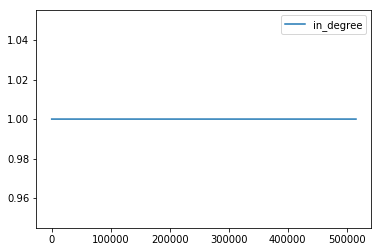

In [11]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

df.plot()

Aha! Now we confirmed that the "block graph" is indeed a "block chain" with no side branches!

Then, how many blocks are there in the blockchain?

In [12]:
len(df.index)

515845

You may comapre this value with the real-time blocks information on https://blockchain.info/blocks to see the delay of BigQuery dataset :)

## New blocks per day

Let's plot something non-trivial: How namy new blocks are mined every day? (query modified from Reference \[[4](#Summary-and-references)\])

In [13]:
QUERY = """
#standardSQL
SELECT
  o.day,
  COUNT(o.block_id) AS blocks_per_day
FROM (
  SELECT
    TIMESTAMP_MILLIS((timestamp - MOD(timestamp,
          86400000))) AS day,
    block_id
  FROM
    `bigquery-public-data.bitcoin_blockchain.blocks`) AS o
GROUP BY
  day
ORDER BY
  day
"""
print(bq_assistant.estimate_query_size(QUERY))
blocks_per_day = bq_assistant.query_to_pandas_safe(QUERY)
print('Size of dataframe: {} Bytes'.format(int(blocks_per_day.memory_usage(index=True, deep=True).sum())))

0.03555093891918659
Size of dataframe: 54000 Bytes


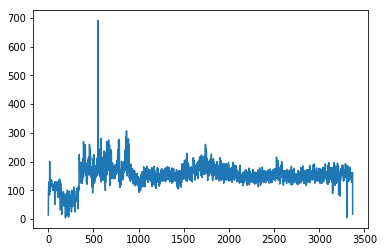

In [14]:
plt.plot(blocks_per_day.index, blocks_per_day.blocks_per_day)

In [15]:
print("Mean: %f" % blocks_per_day.blocks_per_day.mean(0))
idxmax = blocks_per_day.blocks_per_day.idxmax()
maxday = blocks_per_day.day.iloc[idxmax]
print("Max number of blocks mined: %d, on %d/%d/%d (MM/DD/YYYY)" % 
      (blocks_per_day.blocks_per_day.iloc[idxmax], maxday.month, maxday.day, maxday.year))
idxmin = blocks_per_day.blocks_per_day.iloc[500:].idxmin()  # ignore the initial days
minday = blocks_per_day.day.iloc[idxmin]
print("Min number of blocks mined: %d, on %d/%d/%d (MM/DD/YYYY)" % 
      (blocks_per_day.blocks_per_day.iloc[idxmin], minday.month, minday.day, minday.year))

Mean: 153.069733
Max number of blocks mined: 692, on 7/13/2010 (MM/DD/YYYY)
Min number of blocks mined: 5, on 1/30/2018 (MM/DD/YYYY)


According to the design of Bitcoin, approximately each block takes 10 minutes, so the number of blocks per day should be around 144. While the plot roughly matches the design, we can easily observe a spike in the graph: July 13, 2010. On that day, nearly 700 blocks are mined! If we check the date on [Bitcoin history](https://en.bitcoin.it/wiki/2010#July), we can also find a record saying "Bitcoin value begins rising rapidly" in those days. 

Similarly, on Jan 30, 2018, the block generation rate is surprisingly low, and we can find that the price of bitcoin drops to a historically low point (since the exponential blow up of the price last year) five days after that.

## Transactions

After a quick tour to the *blocks* data, we switch to the *transactions* table. Here we can explore more about the network structure since the transaction graph no longer a chain - it is directed, and can have cycles.

Here is the first row of the *transactions* table:

|Header  |Record content                                                    |
|------  |------------------------------------------------------------------|
|timestamp|1514969657000|
|transaction_id|[c51293b5c062efce7ece1217b479311b8136a7a3a91a4f8a90922441aabeba5c]|
|inputs|[System.Collections.Generic.Dictionary 2[System.String,System.Object]]|
|outputs|[System.Collections.Generic.Dictionary 2[System.String,System.Object], System.Collections.Generic.Dictionary 2[System.String,System.Object]]|
|block_id|[0000000000000000002a83ca4f615a2f45c7728c9338bece72709385badc7269]|
|previous_block|[0000000000000000004ec8254a9940229dea3f533e74289fcafebd9d6da61e79]|
|merkle_root|[b7269d97371a6ea6b5608811ade43f238d949784d7d77ad1aa7854bb0ba396f5]|
|nonce|3246264000|
|version|536870912|
|work_terahash|82942944770|
|work_error| |

## Transactions per day

Now since we are already familiar with BigQuery, it easy to plot the number of transactions per day, and we can compare that to the number of blocks above.

21.19024029560387
Size of dataframe: 54000 Bytes


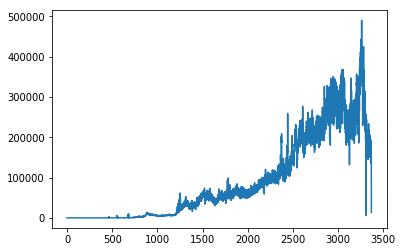

In [16]:
QUERY = """
#standardSQL
SELECT
  o.day,
  COUNT(o.transaction_id) AS trans_per_day
FROM (
  SELECT
    TIMESTAMP_MILLIS((timestamp - MOD(timestamp,
          86400000))) AS day,
    transaction_id
  FROM
    `bigquery-public-data.bitcoin_blockchain.transactions`) AS o
GROUP BY
  day
ORDER BY
  day
"""
print(bq_assistant.estimate_query_size(QUERY))
trans_per_day = bq_assistant.query_to_pandas_safe(QUERY, max_gb_scanned=30)
print('Size of dataframe: {} Bytes'.format(int(trans_per_day.memory_usage(index=True, deep=True).sum())))
plt.plot(trans_per_day.index, trans_per_day.trans_per_day)

One observation is that on the day of maximum number of blocks are mined, the number of transactions look normal, while round the day of minimum number of blocks are mined (except the initial days), the number of transactions are also drastically dropped.

# Example: Relationship between Bitcoin transaction rate and Bitcoin price

If you carefully observe the plot above, you may find that it looks similar to the graph of the price of Bitcoin. Are they related? Let find out!

First, download the dataset containing Bitcoin historical price in [this](https://www.kaggle.com/mczielinski/bitcoin-historical-data/data) Kaggle dataset. Here we use the data ```coinbaseUSD_1-min_data_2014-12-01_to_2018-03-27.csv```, since the size is smaller. Save this zip file to the root path of this tutorial and extract the csv file.

Load the data into this notebook.

In [17]:
import pandas as pd
import datetime

# create timestamp object from integer valued timestamp in csv file
price_data = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-03-27.csv',
                         parse_dates=True, 
                         date_parser=lambda x: datetime.datetime.fromtimestamp(float(x)), 
                         index_col=[0])

In [18]:
price_data.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2014-12-01 00:33:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2014-12-01 00:34:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2014-12-01 00:35:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2014-12-01 00:36:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2014-12-01 00:37:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0


Then we transfer this data into the close price of each day.

In [19]:
ind1 = price_data.index.hour == 0
ind2 = price_data.index.minute == 0
ind3 = price_data.index.second == 0
ind = [True if (ind1[i] == ind2[i]) and (ind2[i] == ind3[i]) else False for i in range(len(ind1))]
price_data_day = price_data[ind]

In [20]:
price_data_day.shape

(1171, 7)

In [21]:
price_data_day = price_data_day.reset_index()
price_data_day['dayindex'] = price_data_day['Timestamp'].apply(lambda x: x.value)
price_data_day = price_data_day.set_index('dayindex')
price_data_day.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
dayindex,,,,,,,,
1417478400000000000,2014-12-02,370.00,370.00,370.00,370.00,0.026556,9.82555,370.00
1417564800000000000,2014-12-03,378.00,378.00,378.00,378.00,0.010000,3.78000,378.00
1420675200000000000,2015-01-08,314.96,314.96,268.98,279.40,0.030000,8.63340,287.78
1421107200000000000,2015-01-13,260.00,260.00,260.00,260.00,1.000000,260.00000,260.00
1421193600000000000,2015-01-14,219.63,219.63,219.63,219.63,0.010000,2.19630,219.63


In [22]:
trans_per_day.shape

(3370, 2)

In [23]:
trans_per_day['dayindex'] = trans_per_day['day'].apply(lambda ts: ts.value)
trans_per_day = trans_per_day.set_index('dayindex')
trans_per_day.head()

,day,trans_per_day
dayindex,,
1231459200000000000,2009-01-09 00:00:00+00:00,14
1231545600000000000,2009-01-10 00:00:00+00:00,61
1231632000000000000,2009-01-11 00:00:00+00:00,93
1231718400000000000,2009-01-12 00:00:00+00:00,101
1231804800000000000,2009-01-13 00:00:00+00:00,123


Join these tables by index (timestamp):

In [24]:
joined_in = price_data_day.join(trans_per_day, how='inner', lsuffix="price_", rsuffix="trans_", sort=True)

In [25]:
joined_in.shape

(1171, 10)

In [26]:
joined_in.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,day,trans_per_day
dayindex,,,,,,,,,,
1417478400000000000,2014-12-02,370.00,370.00,370.00,370.00,0.026556,9.82555,370.00,2014-12-02 00:00:00+00:00,99419
1417564800000000000,2014-12-03,378.00,378.00,378.00,378.00,0.010000,3.78000,378.00,2014-12-03 00:00:00+00:00,99348
1420675200000000000,2015-01-08,314.96,314.96,268.98,279.40,0.030000,8.63340,287.78,2015-01-08 00:00:00+00:00,107132
1421107200000000000,2015-01-13,260.00,260.00,260.00,260.00,1.000000,260.00000,260.00,2015-01-13 00:00:00+00:00,102309
1421193600000000000,2015-01-14,219.63,219.63,219.63,219.63,0.010000,2.19630,219.63,2015-01-14 00:00:00+00:00,104765


Plot two series of values on the same figure with aligned x-value.

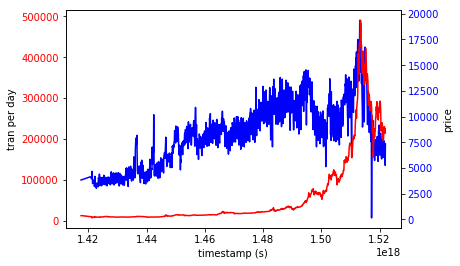

In [27]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(joined_in.index, joined_in.trans_per_day, color='b')
ax.set_xlabel('timestamp (s)')
ax.set_ylabel('tran per day')
ax2.plot(joined_in.index, joined_in.Close, color='r')
ax2.set_xlabel('timestamp (s)')
ax2.set_ylabel('price')

# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None
color_y_axis(ax, 'r')
color_y_axis(ax2, 'b')
plt.show()

The plot shows that although the price of Bitcoin doesn't not exactly follow the number of transactions per day, they show obvious correlation especially in the past year. That may be a helpful input feature for forecasting the Bitcoin price!

# Summary and references

This tutorial introduced the workflow of using BigQuery-based dataset, visualizing and analyzing Bitcoin Blockchain data in Python. Although we just explored some simple tasks related to Bitcoin data, I hope this tutorial inspires your curiority to look for more interesting topics such as "Who has the largest number of Bitcoins?", "Could we find out the same owner of many different wallets?". Further details about all the steps through this process are available from the following links.

1. BigQuery: https://cloud.google.com/bigquery/
2. bq_helper: https://github.com/SohierDane/BigQuery_Helper.git
3. Using SQL to access BigQuery dataset from Kaggle: https://www.kaggle.com/rtatman/sql-scavenger-hunt-handbook/
4. Visualizing Daily Bitcoin Recipients: https://www.kaggle.com/mrisdal/visualizing-daily-bitcoin-recipients
5. Bitcoin history: https://en.bitcoin.it/wiki/2009
6. Bitcoin price: https://www.coindesk.com/price/
7. Bitcoin price dataset: https://www.kaggle.com/mczielinski/bitcoin-historical-data/data